In [ ]:
import pandas as pd 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


###Reading the 12 Months sales data 

In [ ]:
df1 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_January_2019.csv")
df2 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_February_2019.csv")
df3 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_March_2019.csv")
df4 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_April_2019.csv")
df5 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_May_2019.csv")
df6 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_June_2019.csv")
df7 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_July_2019.csv")
df8 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_August_2019.csv")
df9 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_September_2019.csv")
df10 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_October_2019.csv")
df11 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_November_2019.csv")
df12 = pd.read_csv("/content/drive/MyDrive/Sales_Data/Sales_December_2019.csv")

### Merging 12 months of data into single file 

In [ ]:
frames = [df1, df2, df3,df4,df5,df6,df7,df8,df9,df10,df11,df12]
df = pd.concat(frames)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


In [ ]:
print(df.dtypes)

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object


In [ ]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df.columns = ['order_id', 'product', 'quantity_ordered', 'price', 'order_date','purchase_address']

In [ ]:
df.head(5)

,order_id,product,quantity_ordered,price,order_date,purchase_address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [ ]:
df = df[df["order_date"].str.contains("Order Date") == False]

In [ ]:
df.dropna()

,order_id,product,quantity_ordered,price,order_date,purchase_address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_id'] = pd.to_numeric(df['order_id'])
df['quantity_ordered'] = pd.to_numeric(df['quantity_ordered'])
df['price'] = pd.to_numeric(df['price'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 25116
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   order_id          185950 non-null  int64         
 1   product           185950 non-null  object        
 2   quantity_ordered  185950 non-null  int64         
 3   price             185950 non-null  float64       
 4   order_date        185950 non-null  datetime64[ns]
 5   purchase_address  185950 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 9.9+ MB


In [ ]:
df['total_sales'] = df['quantity_ordered'] * df['price']

In [ ]:
df['month'] = pd.DatetimeIndex(df['order_date']).month

**What was the best month for sales? How much was earned that month**




In [ ]:
results = df.groupby('month').sum()

Text(0, 0.5, 'Month number')

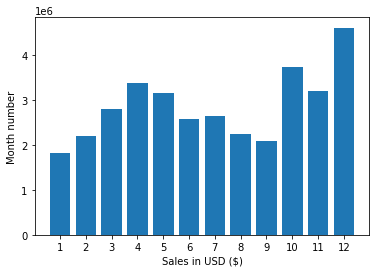

In [ ]:
import matplotlib.pyplot as plt

months = range(1,13)
plt.bar(months, results['total_sales'])
plt.xticks(months)
plt.xlabel('Sales in USD ($)')
plt.ylabel('Month number')

###**Question 2: What city had the highest number of sales?**

In [ ]:
df['city']=[x.split(',')[1] for x in df['purchase_address'].values]

In [ ]:
results_two = df.groupby('city').sum()

Text(0, 0.5, 'Sales in USD ($)')

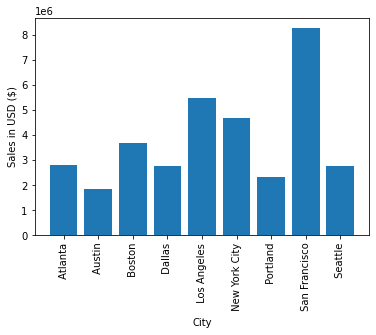

In [ ]:
cities = [city for city, df in df.groupby('city')]
plt.bar(cities, results_two['total_sales'])
plt.xticks(cities, rotation = 'vertical',size= 10)
plt.xlabel('City')
plt.ylabel('Sales in USD ($)')

###**Question 3: What time should we display ads to maximise likelihood of customer's buying product?**

In [ ]:
df['order_date'] = pd.to_datetime(df['order_date'])

In [ ]:
df['hour'] = df['order_date'].dt.hour
df['minute'] = df['order_date'].dt.minute

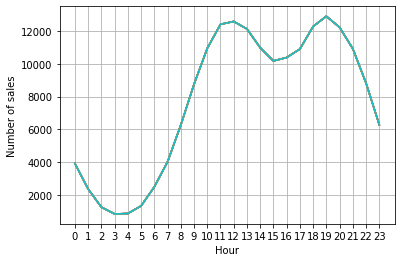

In [ ]:
hours = [hour for hour, df in df.groupby('hour')]
plt.plot(hours, df.groupby(['hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of sales')
plt.grid()
plt.show()

### **Question 4: What products are most often sold together?** 

In [ ]:
df_new = df[df['order_id'].duplicated(keep = False)]

In [ ]:
df_new['grouped'] = df_new.groupby('order_id')['product'].transform(lambda x: ','.join(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_new.head(5)

,order_id,product,quantity_ordered,price,order_date,purchase_address,total_sales,month,city,hour,minute,grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.95,1,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",11.99,1,Austin,16,6,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",150.00,1,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",11.52,1,Los Angeles,8,25,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",400.00,1,New York City,11,19,"Vareebadd Phone,Wired Headphones"


In [ ]:
df_new = df_new[['order_id','grouped']].drop_duplicates()

In [ ]:
df_new.head(5)

,order_id,grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [ ]:
from itertools import combinations
from collections import Counter 

count = Counter()
for i in df_new['grouped']:
  list = i.split(',')
  count.update(Counter(combinations(list,2)))

for x, y in count.most_common(10):
  print(f"Product duo: {x}, The amount sold: {y}")

Product duo: ('iPhone', 'Lightning Charging Cable'), The amount sold: 1005
Product duo: ('Google Phone', 'USB-C Charging Cable'), The amount sold: 987
Product duo: ('iPhone', 'Wired Headphones'), The amount sold: 447
Product duo: ('Google Phone', 'Wired Headphones'), The amount sold: 414
Product duo: ('Vareebadd Phone', 'USB-C Charging Cable'), The amount sold: 361
Product duo: ('iPhone', 'Apple Airpods Headphones'), The amount sold: 360
Product duo: ('Google Phone', 'Bose SoundSport Headphones'), The amount sold: 220
Product duo: ('USB-C Charging Cable', 'Wired Headphones'), The amount sold: 160
Product duo: ('Vareebadd Phone', 'Wired Headphones'), The amount sold: 143
Product duo: ('Lightning Charging Cable', 'Wired Headphones'), The amount sold: 92


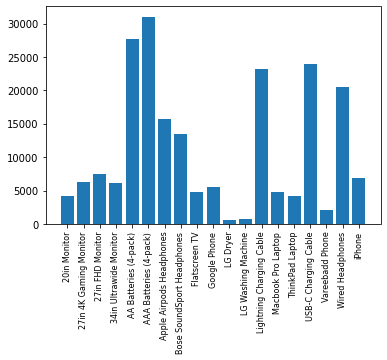

In [ ]:
### Most purchased products 

product_group = df.groupby('product')
quantity_ordered = product_group.sum()['quantity_ordered']

keys = [pair for pair, df_new in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()